[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rbg-research/AI-Training/blob/main/voice-analytics/speech-analytics-deep-learning/session-1/Tutorial-2.ipynb)

# Data Preparation

In [1]:
import random
random.seed(10)

In [2]:
import librosa
import numpy as np
import pandas as pd
from datasets import load_dataset
import timeit

* Pandas - open source data analysis and manipulation tool
* For more information refer this [link](https://pandas.pydata.org/)

* Common Voice - an open source, multi-language dataset of voices that anyone can use to train speech-enabled applications.
* Each entry in the dataset consists of a unique MP3 and corresponding text file.
* Many of the 13,905 recorded hours in the dataset also include demographic metadata like age, sex, and accent that can help train the accuracy of speech recognition engines.
* Available for 76 languages
* For more information refer this [link](https://commonvoice.mozilla.org/en/datasets)

In [3]:
dataset = load_dataset('common_voice', 'hi') # loads hindi corpus

Reusing dataset common_voice (/home/ubuntu/.cache/huggingface/datasets/common_voice/hi/6.1.0/078d412587e9efeb0ae2e574da99c31e18844c496008d53dc5c60f4159ed639b)


  0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
dataset = load_dataset('common_voice', 'ta') # loads tamil corpus
train = dataset["train"]

Reusing dataset common_voice (/home/ubuntu/.cache/huggingface/datasets/common_voice/ta/6.1.0/078d412587e9efeb0ae2e574da99c31e18844c496008d53dc5c60f4159ed639b)


  0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['client_id', 'path', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 2009
    })
    test: Dataset({
        features: ['client_id', 'path', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 1781
    })
    validation: Dataset({
        features: ['client_id', 'path', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 1779
    })
    other: Dataset({
        features: ['client_id', 'path', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 7428
    })
    invalidated: Dataset({
        features: ['client_id', 'path', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 594
    })
})

In [6]:
train_files, train_labels = dataset["train"]["path"], dataset["train"]["gender"]
train_df = pd.DataFrame.from_dict({"path": train_files, "label": train_labels})
train_df = train_df[train_df["label"]!=""] # filtering the sample that doesn't have the gender class
train_files, train_labels = list(train_df["path"]), list(train_df["label"])

In [7]:
train_labels.count("male"), train_labels.count("female")

(885, 770)

# Feature Extraction - MFCC 

In [8]:
x , sr = librosa.load(train_files[0], sr=16000)

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [9]:
mfcc = librosa.feature.mfcc(x, sr=sr, n_mfcc=20)

In [10]:
mfcc.shape

(20, 189)

In [11]:
mfcc.reshape(-1,1)[:1000] # flattening to get a single feature vector

array([[-4.51435608e+02],
       [-3.67629486e+02],
       [-3.38494232e+02],
       [-3.38537079e+02],
       [-3.38716705e+02],
       [-3.38574097e+02],
       [-3.33551941e+02],
       [-3.39381805e+02],
       [-3.41855194e+02],
       [-3.38403687e+02],
       [-3.39260773e+02],
       [-3.40029022e+02],
       [-3.33917786e+02],
       [-3.36377502e+02],
       [-3.41612671e+02],
       [-3.39596283e+02],
       [-3.37560455e+02],
       [-3.38064850e+02],
       [-3.40451294e+02],
       [-3.40921722e+02],
       [-3.39354309e+02],
       [-3.41612732e+02],
       [-3.45105530e+02],
       [-3.45402832e+02],
       [-3.43146271e+02],
       [-3.40112732e+02],
       [-3.40829651e+02],
       [-3.45284729e+02],
       [-3.40237793e+02],
       [-3.39211639e+02],
       [-3.41450775e+02],
       [-3.44024628e+02],
       [-3.41083038e+02],
       [-3.36530914e+02],
       [-3.40688385e+02],
       [-3.36476349e+02],
       [-3.36013092e+02],
       [-3.38720917e+02],
       [-3.3

In [12]:
def get_mfcc_features(files, labels):
    temp_feats = list()
    temp_labels = list()
    
    for file, label in zip(files, labels):
        try:
            x , sr = librosa.load(file, sr=16000) # load the audio file
            mfcc = librosa.feature.mfcc(x, sr=sr, n_mfcc=20) # extract the mfcc features
            temp_feats.append(mfcc.reshape(-1,1)[:1000]) # flattening to get a single feature vector
            # fixing to get only the 1000 samples to have common feature size though the audio length differs
            temp_labels.append(label)
        except:
            pass
    return np.array(temp_feats).reshape(len(temp_feats),-1), np.array(temp_labels)

In [13]:
train_features, train_labels = get_mfcc_features(train_files, train_labels)

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/ubuntu/environments/insights/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread inst

In [14]:
train_features.shape

(1655, 1000)

# Conventional Machine Learning - Logistic Regression

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

[model=One versus Rest, solver=saga] Number of epochs: 1
[model=One versus Rest, solver=saga] Number of epochs: 2
[model=One versus Rest, solver=saga] Number of epochs: 4


/home/ubuntu/environments/insights/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ubuntu/environments/insights/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ubuntu/environments/insights/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/ubuntu/environments/insights/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Test accuracy for model ovr: 0.7795
Run time (4 epochs) for model ovr:0.15
[model=Multinomial, solver=saga] Number of epochs: 1
[model=Multinomial, solver=saga] Number of epochs: 3


/home/ubuntu/environments/insights/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[model=Multinomial, solver=saga] Number of epochs: 7
Test accuracy for model multinomial: 0.7915
Run time (7 epochs) for model multinomial:0.29
Example run in 0.929 s


/home/ubuntu/environments/insights/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


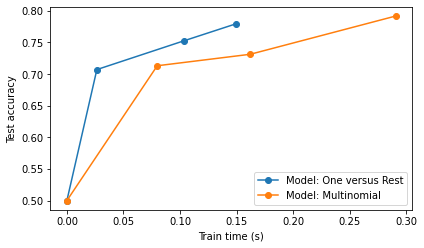

In [16]:
t0 = timeit.default_timer()

# We use SAGA solver
solver = 'saga'

scaler = MinMaxScaler(feature_range=(0, 1))
train_features = scaler.fit_transform(train_features) # normalising the input feature matrix

# split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.20, random_state=1150)
train_samples, n_features = X_train.shape
n_classes = np.unique(y_train).shape[0]


models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 2, 4]},
          'multinomial': {'name': 'Multinomial', 'iters': [1, 3, 7]}}

for model in models:
    # add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # small number of epochs for fast runtime
    for this_max_iter in model_params['iters']:
        print('[model=%s, solver=%s] Number of epochs: %s' %
              (model_params['name'], solver, this_max_iter))
        lr = LogisticRegression(solver=solver,
                                multi_class=model,
                                penalty='l1',
                                max_iter=this_max_iter,
                                random_state=42,
                                )
        t1 = timeit.default_timer()
        lr.fit(X_train, y_train)
        train_time = timeit.default_timer() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]['times'] = times
    models[model]['densities'] = densities
    models[model]['accuracies'] = accuracies
    print('Test accuracy for model %s: %.4f' % (model, accuracies[-1]))
    print('Run time (%i epochs) for model %s:'
          '%.2f' % (model_params['iters'][-1], model, times[-1]))

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]['name']
    times = models[model]['times']
    accuracies = models[model]['accuracies']
    ax.plot(times, accuracies, marker='o',
            label='Model: %s' % name)
    ax.set_xlabel('Train time (s)')
    ax.set_ylabel('Test accuracy')
ax.legend()
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print('Example run in %.3f s' % run_time)
plt.show()

# Deep Learning - Simple Neural Network

In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder

* Tensorflow - end-to-end open source platform for machine learning
* Focused on training and inference of deep neural networks
* For more information refer this [link](https://www.tensorflow.org/)

* Keras -  interface for artificial neural networks libraries
* high-level API
* For more information refer this (link)[https://keras.io/]

In [18]:

# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=train_features.shape[1], activation='relu')) # one hidden layer
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [19]:
model = create_baseline()

2021-10-18 05:26:56.435045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 05:26:56.443909: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 05:26:56.444513: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 05:26:56.445781: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [20]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train) # encode the label to get classes in numerical format

model.fit(X_train, encoded_Y, epochs=1000)

2021-10-18 05:26:57.346423: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
42/42 [==============================] - 1s 2ms/step - loss: 0.7260 - accuracy: 0.5468
Epoch 2/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.6480
Epoch 3/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.7160
Epoch 4/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.7160
Epoch 5/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.7334
Epoch 6/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7387
Epoch 7/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7613
Epoch 8/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7560
Epoch 9/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.7364
Epoch 10/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7900

42/42 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9902
Epoch 163/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9864
Epoch 164/1000
42/42 [==============================] - 0s 1ms/step - loss: 0.0623 - accuracy: 0.9894
Epoch 165/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9849
Epoch 166/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9819
Epoch 167/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9872
Epoch 168/1000
42/42 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9909
Epoch 169/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9887
Epoch 170/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9932
Epoch 171/1000
42/42 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.

42/42 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 323/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 324/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 325/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 326/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 327/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 328/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 329/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 330/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 331/1000
42/42 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.

42/42 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 483/1000
42/42 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 484/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 485/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 486/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 487/1000
42/42 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 488/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 489/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 490/1000
42/42 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 491/1000
42/42 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.

42/42 [==============================] - 0s 2ms/step - loss: 9.5312e-04 - accuracy: 1.0000
Epoch 643/1000
42/42 [==============================] - 0s 2ms/step - loss: 9.9469e-04 - accuracy: 1.0000
Epoch 644/1000
42/42 [==============================] - 0s 1ms/step - loss: 9.4086e-04 - accuracy: 1.0000
Epoch 645/1000
42/42 [==============================] - 0s 1ms/step - loss: 9.2652e-04 - accuracy: 1.0000
Epoch 646/1000
42/42 [==============================] - 0s 1ms/step - loss: 9.2424e-04 - accuracy: 1.0000
Epoch 647/1000
42/42 [==============================] - 0s 1ms/step - loss: 9.2258e-04 - accuracy: 1.0000
Epoch 648/1000
42/42 [==============================] - 0s 1ms/step - loss: 9.5522e-04 - accuracy: 1.0000
Epoch 649/1000
42/42 [==============================] - 0s 2ms/step - loss: 9.4981e-04 - accuracy: 1.0000
Epoch 650/1000
42/42 [==============================] - 0s 1ms/step - loss: 9.1515e-04 - accuracy: 1.0000
Epoch 651/1000
42/42 [==============================] - 0s 2m

42/42 [==============================] - 0s 1ms/step - loss: 4.1597e-04 - accuracy: 1.0000
Epoch 797/1000
42/42 [==============================] - 0s 2ms/step - loss: 4.1179e-04 - accuracy: 1.0000
Epoch 798/1000
42/42 [==============================] - 0s 2ms/step - loss: 4.0650e-04 - accuracy: 1.0000
Epoch 799/1000
42/42 [==============================] - 0s 1ms/step - loss: 4.1558e-04 - accuracy: 1.0000
Epoch 800/1000
42/42 [==============================] - 0s 2ms/step - loss: 4.1220e-04 - accuracy: 1.0000
Epoch 801/1000
42/42 [==============================] - 0s 1ms/step - loss: 4.2214e-04 - accuracy: 1.0000
Epoch 802/1000
42/42 [==============================] - 0s 2ms/step - loss: 4.1776e-04 - accuracy: 1.0000
Epoch 803/1000
42/42 [==============================] - 0s 2ms/step - loss: 4.0142e-04 - accuracy: 1.0000
Epoch 804/1000
42/42 [==============================] - 0s 1ms/step - loss: 4.0207e-04 - accuracy: 1.0000
Epoch 805/1000
42/42 [==============================] - 0s 2m

42/42 [==============================] - 0s 2ms/step - loss: 2.2315e-04 - accuracy: 1.0000
Epoch 951/1000
42/42 [==============================] - 0s 2ms/step - loss: 2.2296e-04 - accuracy: 1.0000
Epoch 952/1000
42/42 [==============================] - 0s 2ms/step - loss: 2.2412e-04 - accuracy: 1.0000
Epoch 953/1000
42/42 [==============================] - 0s 2ms/step - loss: 2.2381e-04 - accuracy: 1.0000
Epoch 954/1000
42/42 [==============================] - 0s 2ms/step - loss: 2.2170e-04 - accuracy: 1.0000
Epoch 955/1000
42/42 [==============================] - 0s 2ms/step - loss: 2.2423e-04 - accuracy: 1.0000
Epoch 956/1000
42/42 [==============================] - 0s 1ms/step - loss: 2.2155e-04 - accuracy: 1.0000
Epoch 957/1000
42/42 [==============================] - 0s 2ms/step - loss: 2.1812e-04 - accuracy: 1.0000
Epoch 958/1000
42/42 [==============================] - 0s 2ms/step - loss: 2.1745e-04 - accuracy: 1.0000
Epoch 959/1000
42/42 [==============================] - 0s 2m

In [21]:
encoded_Y1 = encoder.transform(y_test)
loss_and_metrics = model.evaluate(X_test, encoded_Y1)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

11/11 [==============================] - 0s 1ms/step - loss: 1.0756 - accuracy: 0.8822
Loss =  1.075626015663147
Accuracy =  0.8821752071380615
